In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [4]:
df=pd.read_csv('parkinsons.csv')
df.head()
print(df.shape)

(195, 24)


In [5]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [6]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


<AxesSubplot:>

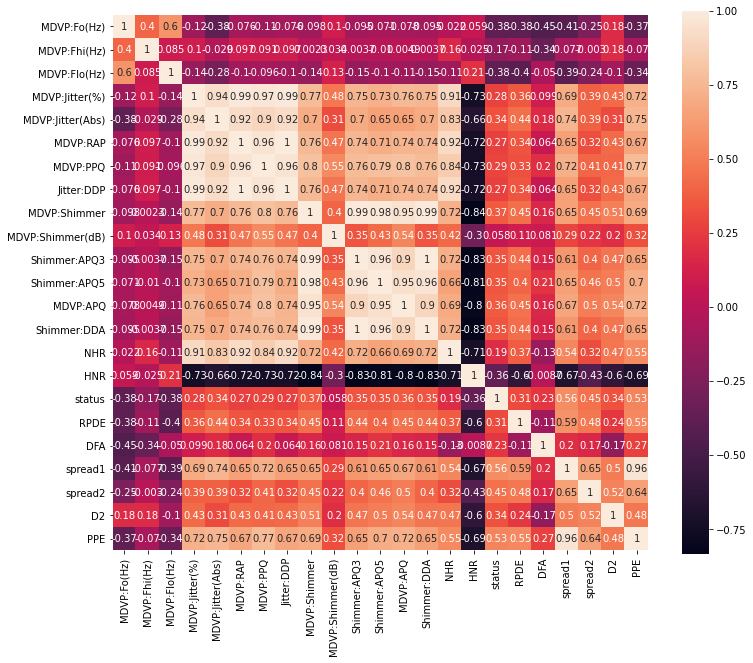

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True, square=True)

In [8]:
corr_df = df.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_matrix.mask(mask)
tri_df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fhi(Hz),0.400985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Flo(Hz),0.596546,0.084951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer(dB),0.100129,0.034464,0.127922,0.483178,0.312039,0.466782,0.550628,0.466886,0.404101,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print(to_drop)

['MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ', 'MDVP:Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'spread1']


In [10]:
reduced_df = df.drop(to_drop, axis=1)

In [11]:
reduced_df.to_csv('reduced_df.csv', index=None, header=True)

In [12]:
reduced_df.shape

(195, 17)

In [13]:
reduced_df = reduced_df.drop("name",axis=1)

In [39]:
X = reduced_df.drop("status",axis=1)
Y = reduced_df["status"]

# Splitting Data into 70% Training data and 30% Testing Data:
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=0)
print(len(X_train)),print(len(X_test))


136
59


(None, None)

In [40]:
#scaling the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
accuracies = {}

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 86.44%


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 NN Score: 91.53%


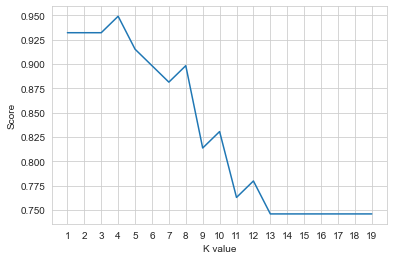

Maximum KNN Score is 94.92%


In [44]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100

accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 59.32%


In [46]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 84.75%


In [47]:
# SVM Classification

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
confusion_matrix(y_pred,y_test)
classifier_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, classifier_predictions)*100
accuracies['SVM'] = acc
print("SVM Accuracy Score : {:.2f}%".format(acc))

SVM Accuracy Score : 79.66%


In [48]:
# Neural Network Classification

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
#acc = mlp.score(x_test,y_test)*100
accuracies['Neural Network'] = acc
print("Neural Network Accuracy Score : {:.2f}%".format(acc))

Neural Network Accuracy Score : 79.66%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


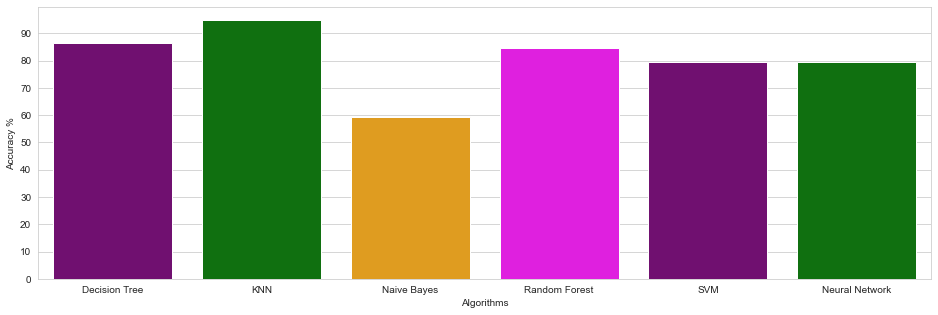

In [49]:
# PLOTS

colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


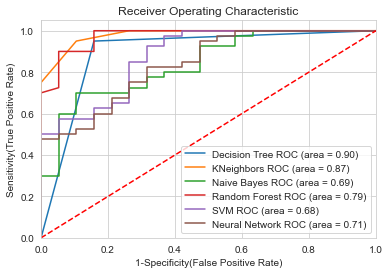

In [51]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'KNeighbors',
    'model': KNeighborsClassifier(),   
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'Random Forest',
    
    'model': RandomForestClassifier(),
},
{
    'label': 'SVM',
    'model': svm.SVC(probability=True),
},
{
    'label': 'Neural Network',
    'model': MLPClassifier(),
}    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(
        X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display